In [ ]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from l2_pipeline import L2DatasetLoader

In [6]:
# === Load Data ===
data_dir = "data"
nc_files = glob.glob(os.path.join(data_dir, '**', '*.nc'), recursive=True)
print(f"Found {len(nc_files)} files.")

Found 41 files.


In [7]:
loader = L2DatasetLoader(variable='chlor_a')
datasets = loader.load_multiple(nc_files)

f:\Programming\GitHub\nasa-murep-local\river_plumes\l2_pipeline.py:20: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  n_lines = geo_ds.dims['number_of_lines']
f:\Programming\GitHub\nasa-murep-local\river_plumes\l2_pipeline.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  n_pixels = geo_ds.dims['pixels_per_line']
f:\Programming\GitHub\nasa-murep-local\river_plumes\l2_pipeline.py:20: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to

Skipping data\Mississippi_2021-06-21_2021-07-21\AQUA_MODIS.20210630T182501.L2.OC.nc due to error: "No variable named 'cntl_pt_cols'. Variables on the dataset include ['longitude', 'latitude', 'tilt']"
Skipping data\Mississippi_2021-06-21_2021-07-21\AQUA_MODIS.20210630T183001.L2.OC.nc due to error: "No variable named 'cntl_pt_cols'. Variables on the dataset include ['longitude', 'latitude', 'tilt']"
Skipping data\Mississippi_2021-06-21_2021-07-21\AQUA_MODIS.20210630T200501.L2.OC.nc due to error: "No variable named 'cntl_pt_cols'. Variables on the dataset include ['longitude', 'latitude', 'tilt']"
Skipping data\Mississippi_2021-06-21_2021-07-21\AQUA_MODIS.20210701T191000.L2.OC.nc due to error: "No variable named 'cntl_pt_cols'. Variables on the dataset include ['longitude', 'latitude', 'tilt']"
Skipping data\Mississippi_2021-06-21_2021-07-21\AQUA_MODIS.20210702T181501.L2.OC.nc due to error: "No variable named 'cntl_pt_cols'. Variables on the dataset include ['longitude', 'latitude', 'til

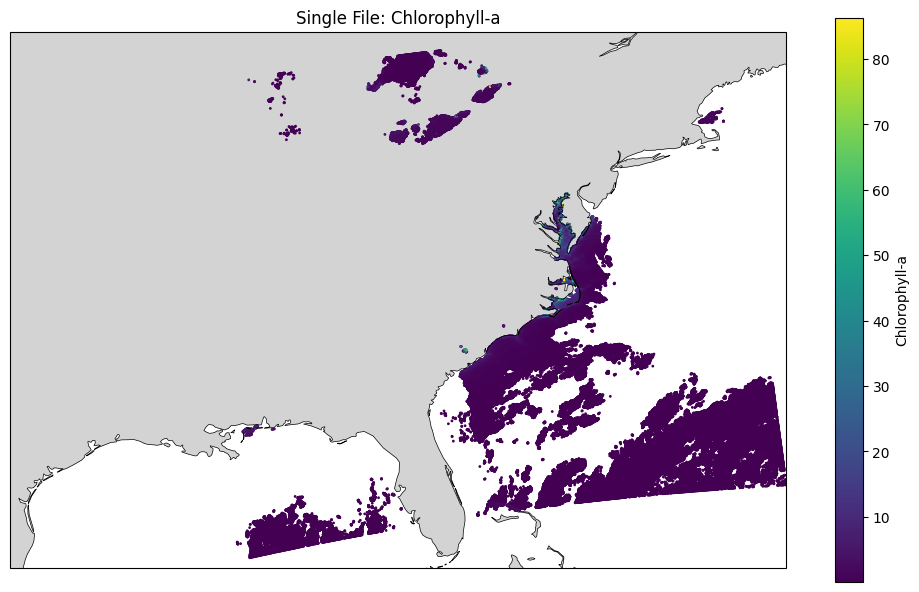

In [9]:
# === Plot Single Example ===
ds = datasets[0]
var = ds['chlor_a'].values.flatten()
lat = ds['lat'].values.flatten()
lon = ds['lon'].values.flatten()

mask = (var != np.nan) & (lat != np.nan) & (lon != np.nan)

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

sc = ax.scatter(lon[mask], lat[mask], c=var[mask], cmap='viridis', s=1, transform=ccrs.PlateCarree())
plt.colorbar(sc, label='Chlorophyll-a')
plt.title("Single File: Chlorophyll-a")
plt.tight_layout()
plt.show()

C:\Users\Makai\AppData\Local\Temp\ipykernel_34824\1392205876.py:17: UserWarning: Adding colorbar to a different Figure <Figure size 1000x600 with 4 Axes> than <Figure size 1200x700 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(sc, label='Chlorophyll-a')


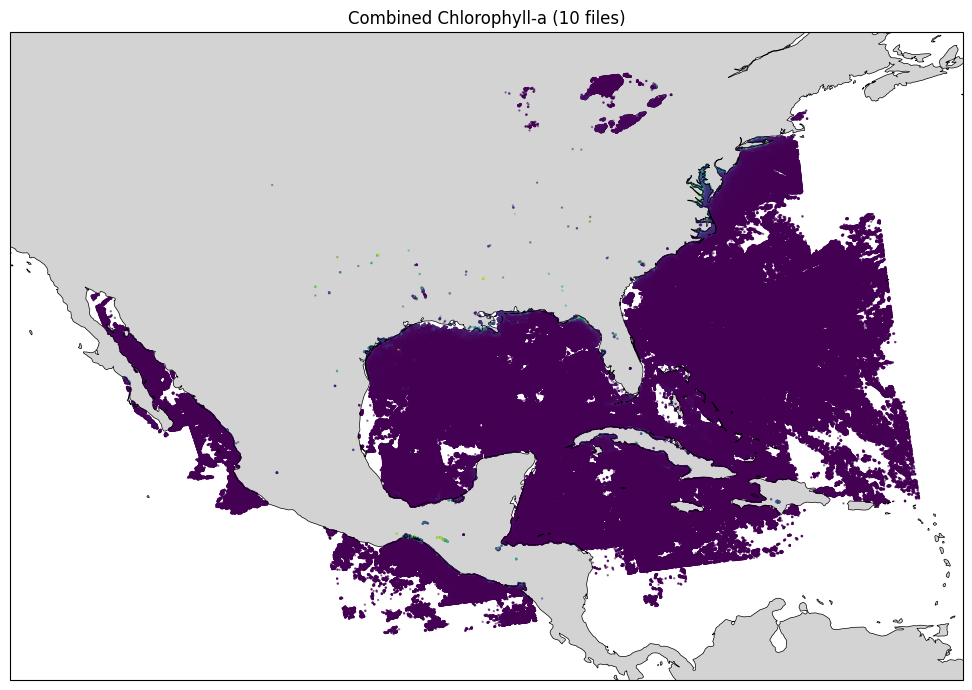

In [11]:
# === Plot Multiple Overlaid ===
fig = plt.figure(figsize=(12, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

mds = datasets[0:10]

for ds in mds:
    var = ds['chlor_a'].values.flatten()
    lat = ds['lat'].values.flatten()
    lon = ds['lon'].values.flatten()

    mask = (var != np.nan) & (lat != np.nan) & (lon != np.nan)
    ax.scatter(lon[mask], lat[mask], c=var[mask], cmap='viridis', s=0.5, alpha=0.5, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
plt.colorbar(sc, label='Chlorophyll-a')
plt.title(f"Combined Chlorophyll-a ({len(mds)} files)")
plt.tight_layout()
plt.show()